# [數值型資料]

## 讀取訓練資料

In [10]:
import pandas as pd

df = pd.read_csv('./ex1.csv')
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False


In [35]:
df_train = df.loc[:, ['HP', 'Attack', 'Defense']]
df_train

,HP,Attack,Defense
0,45.0,49,49
1,60.0,62,63
2,80.0,82,83
3,80.0,100,123
4,39.0,52,43
...,...,...,...
163,106.0,190,100
164,106.0,150,70
165,100.0,100,100
166,NaN,62,80


In [36]:
# 去除欄位有 NaN 的資料
df_train = df_train.dropna(axis=0)
df_train

,HP,Attack,Defense
0,45.0,49,49
1,60.0,62,63
2,80.0,82,83
3,80.0,100,123
4,39.0,52,43
...,...,...,...
161,91.0,134,95
162,106.0,110,90
163,106.0,190,100
164,106.0,150,70


參考資料: [深入理解 Scikit-Learn 中的 fit, transform 和 fit_transform](https://blog.csdn.net/jjqhj/article/details/140906700)
### fit - 作用：計算並儲存模型參數（如平均值、標準差）。 
- 適用對象：估計器、轉換器。 
- 主要使用場景：參數計算。 
### transform - 作用：使用`fit` 方法計算所得的參數對資料進行轉換。 
- 適用物件：轉換器。 
- 主要使用場景：資料轉換，進行縮放、標準化或正規化。 
### fit_transform 
- 作用：先`fit`（計算並儲存參數），再`transform`（轉換資料）。 
- 適用物件：轉換器。 
- 主要使用場景：資料預處理時一步完成參數計算和資料轉換。

## StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler

# 建立標準化縮放器並進行擬合
scaler = StandardScaler().fit(df_train)

In [38]:
scaler.mean_    # 擬合後的平均值

array([65.81927711, 76.63855422, 70.86144578])

In [42]:
scaler.scale_   # 擬合後的標準差

array([28.06903906, 30.6519829 , 28.55493683])

In [43]:
X_train_std = scaler.transform(df_train)    # 標準化轉換
X_train_std

array([[-0.74171677, -0.90168895, -0.76559251],
       [-0.20732014, -0.47757283, -0.27530951],
       [ 0.50520871,  0.17491351,  0.42509477],
       [ 0.50520871,  0.76215121,  1.82590333],
       [-0.95547543, -0.803816  , -0.9757138 ],
       [-0.27857302, -0.4123242 , -0.45041058],
       [ 0.43395582,  0.24016214,  0.2499937 ],
       [ 0.43395582,  1.74088071,  1.40566076],
       [ 0.43395582,  0.89264847,  0.2499937 ],
       [-0.77734322, -0.93431326, -0.20526909],
       [-0.24294658, -0.44494851,  0.32003412],
       [ 0.46958226,  0.20753782,  1.02043841],
       [ 0.46958226,  0.86002416,  1.72084269],
       [-0.74171677, -1.52155097, -1.25587551],
       [-0.56358456, -1.84779413, -0.55547123],
       [-0.20732014, -1.03218622, -0.7305723 ],
       [-0.91984899, -1.35842938, -1.43097658],
       [-0.74171677, -1.68467255, -0.7305723 ],
       [-0.02918793,  0.43590804, -1.08077444],
       [-0.02918793,  2.39336705, -1.08077444],
       [-0.91984899, -1.03218622, -1.080

In [44]:
print("Mean:", X_train_std.mean())
print("Standard deviation:", X_train_std.std())

Mean: -2.853585284177109e-17
Standard deviation: 1.0


## MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

# 建立最小最大縮放器
min_max_scaler = MinMaxScaler()

# 進行擬合後直接轉換
X_train_minmax = min_max_scaler.fit_transform(df_train)

X_train_minmax

array([[0.14583333, 0.23783784, 0.25142857],
       [0.20833333, 0.30810811, 0.33142857],
       [0.29166667, 0.41621622, 0.44571429],
       [0.29166667, 0.51351351, 0.67428571],
       [0.12083333, 0.25405405, 0.21714286],
       [0.2       , 0.31891892, 0.30285714],
       [0.28333333, 0.42702703, 0.41714286],
       [0.28333333, 0.67567568, 0.60571429],
       [0.28333333, 0.53513514, 0.41714286],
       [0.14166667, 0.23243243, 0.34285714],
       [0.20416667, 0.31351351, 0.42857143],
       [0.2875    , 0.42162162, 0.54285714],
       [0.2875    , 0.52972973, 0.65714286],
       [0.14583333, 0.13513514, 0.17142857],
       [0.16666667, 0.08108108, 0.28571429],
       [0.20833333, 0.21621622, 0.25714286],
       [0.125     , 0.16216216, 0.14285714],
       [0.14583333, 0.10810811, 0.25714286],
       [0.22916667, 0.45945946, 0.2       ],
       [0.22916667, 0.78378378, 0.2       ],
       [0.125     , 0.21621622, 0.2       ],
       [0.22083333, 0.2972973 , 0.28571429],
       [0.

In [28]:
# (Optional) 縮放區間改為 [1, 10]
X_train_minmax = MinMaxScaler(
    feature_range=(1, 10)
).fit_transform(df_train)

X_train_minmax

array([[ 2.3125    ,  3.14054054,  3.26285714],
       [ 2.875     ,  3.77297297,  3.98285714],
       [ 3.625     ,  4.74594595,  5.01142857],
       [ 3.625     ,  5.62162162,  7.06857143],
       [ 2.0875    ,  3.28648649,  2.95428571],
       [ 2.8       ,  3.87027027,  3.72571429],
       [ 3.55      ,  4.84324324,  4.75428571],
       [ 3.55      ,  7.08108108,  6.45142857],
       [ 3.55      ,  5.81621622,  4.75428571],
       [ 2.275     ,  3.09189189,  4.08571429],
       [ 2.8375    ,  3.82162162,  4.85714286],
       [ 3.5875    ,  4.79459459,  5.88571429],
       [ 3.5875    ,  5.76756757,  6.91428571],
       [ 2.3125    ,  2.21621622,  2.54285714],
       [ 2.5       ,  1.72972973,  3.57142857],
       [ 2.875     ,  2.94594595,  3.31428571],
       [ 2.125     ,  2.45945946,  2.28571429],
       [ 2.3125    ,  1.97297297,  3.31428571],
       [ 3.0625    ,  5.13513514,  2.8       ],
       [ 3.0625    ,  8.05405405,  2.8       ],
       [ 2.125     ,  2.94594595,  2.8  

## RobustScaler

In [46]:
from sklearn.preprocessing import RobustScaler

# 建立縮放器
scale = RobustScaler().fit(df_train)
X_train_robust = scale.transform(df_train)

X_train_robust

array([[-0.50746269, -0.65      , -0.48571429],
       [-0.05970149, -0.325     , -0.08571429],
       [ 0.53731343,  0.175     ,  0.48571429],
       [ 0.53731343,  0.625     ,  1.62857143],
       [-0.68656716, -0.575     , -0.65714286],
       [-0.11940299, -0.275     , -0.22857143],
       [ 0.47761194,  0.225     ,  0.34285714],
       [ 0.47761194,  1.375     ,  1.28571429],
       [ 0.47761194,  0.725     ,  0.34285714],
       [-0.53731343, -0.675     , -0.02857143],
       [-0.08955224, -0.3       ,  0.4       ],
       [ 0.50746269,  0.2       ,  0.97142857],
       [ 0.50746269,  0.7       ,  1.54285714],
       [-0.50746269, -1.125     , -0.88571429],
       [-0.35820896, -1.375     , -0.31428571],
       [-0.05970149, -0.75      , -0.45714286],
       [-0.65671642, -1.        , -1.02857143],
       [-0.50746269, -1.25      , -0.45714286],
       [ 0.08955224,  0.375     , -0.74285714],
       [ 0.08955224,  1.875     , -0.74285714],
       [-0.65671642, -0.75      , -0.742

## Normalizer

In [48]:
from sklearn.preprocessing import Normalizer

# 建立正規化縮放器
norm = Normalizer(norm='l2').fit(df_train)
X_train_norm_l2 = norm.transform(df_train)

X_train_norm_l2

array([[0.54462499, 0.5930361 , 0.5930361 ],
       [0.56163135, 0.58035239, 0.58971292],
       [0.56550167, 0.57963921, 0.58670798],
       [0.45054159, 0.56317699, 0.6927077 ],
       [0.50041142, 0.66721523, 0.55173567],
       [0.55748617, 0.61515716, 0.55748617],
       [0.56256502, 0.60583925, 0.56256502],
       [0.41512271, 0.69187119, 0.59075155],
       [0.51449576, 0.68599434, 0.51449576],
       [0.47823262, 0.52170831, 0.70648001],
       [0.50133396, 0.5353227 , 0.67977486],
       [0.51944465, 0.54574564, 0.65752487],
       [0.44689149, 0.58265599, 0.67882251],
       [0.69853547, 0.46569032, 0.54330537],
       [0.6495698 , 0.25982792, 0.71452678],
       [0.66564024, 0.49923018, 0.5547002 ],
       [0.65538554, 0.57346234, 0.49153915],
       [0.62705971, 0.34836651, 0.69673301],
       [0.55082768, 0.76268448, 0.33897088],
       [0.38621434, 0.89126387, 0.23767036],
       [0.55337157, 0.62254302, 0.55337157],
       [0.61208335, 0.58293652, 0.53435848],
       [0.

In [49]:
# l1 正規化調整樣本特徵值，其總和為 1
norm = Normalizer(norm='l1').fit(df_train)
X_train_norm_l1 = norm.transform(df_train)

X_train_norm_l1

array([[0.31468531, 0.34265734, 0.34265734],
       [0.32432432, 0.33513514, 0.34054054],
       [0.32653061, 0.33469388, 0.33877551],
       [0.2640264 , 0.330033  , 0.40594059],
       [0.29104478, 0.3880597 , 0.32089552],
       [0.32222222, 0.35555556, 0.32222222],
       [0.325     , 0.35      , 0.325     ],
       [0.24451411, 0.40752351, 0.34796238],
       [0.3       , 0.4       , 0.3       ],
       [0.28025478, 0.30573248, 0.41401274],
       [0.29207921, 0.31188119, 0.3960396 ],
       [0.30152672, 0.31679389, 0.38167939],
       [0.2615894 , 0.3410596 , 0.39735099],
       [0.40909091, 0.27272727, 0.31818182],
       [0.4       , 0.16      , 0.44      ],
       [0.38709677, 0.29032258, 0.32258065],
       [0.38095238, 0.33333333, 0.28571429],
       [0.375     , 0.20833333, 0.41666667],
       [0.33333333, 0.46153846, 0.20512821],
       [0.25490196, 0.58823529, 0.15686275],
       [0.32      , 0.36      , 0.32      ],
       [0.35393258, 0.33707865, 0.30898876],
       [0.

# [類別型資料]

In [43]:
import pandas as pd

df = pd.read_csv('./ex1.csv')
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False


In [44]:
df_train = df.loc[:, ['Name', 'Type1', 'Legendary']]
df_train

,Name,Type1,Legendary
0,妙蛙種子,Grass,False
1,妙蛙草,Grass,False
2,妙蛙花,Grass,False
3,妙蛙花Mega,Grass,False
4,小火龍,Fire,False
...,...,...,...
163,超夢MegaX,Psychic,True
164,超夢MegaY,Psychic,True
165,夢幻,Psychic,False
166,月桂葉,Grass,False


In [45]:
# 將類別型資料轉換成虛擬特徵
df_encode = pd.get_dummies(
    df_train, 
    columns=['Type1', 'Legendary'],
    dtype=int
)
df_encode

,Name,Type1_Bug,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Water,Legendary_False,Legendary_True
0,妙蛙種子,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,妙蛙草,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,妙蛙花,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,妙蛙花Mega,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,小火龍,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,超夢MegaX,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
164,超夢MegaY,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
165,夢幻,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
166,月桂葉,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## LabelBinarizer

In [46]:
from sklearn.preprocessing import LabelBinarizer

# 建立編碼器並進行擬合
lb = LabelBinarizer()
lb = lb.fit(df_train['Type1'])
binary_labels = lb.transform(df_train['Type1'])

binary_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder

# 建立編碼器並進行擬合
le = LabelEncoder()
le = le.fit(df_train['Type1'])
encoded_labels = le.transform(df_train['Type1'])

print(encoded_labels)
print(le.classes_)

[ 7  7  7  7  5  5  5  5  5 14 14 14 14  0  0  0  0  0  0  0 10 10 10 10
 10 10 10 10 11 11  2  2  8  8 11 11 11 11 11 11  3  3  5  5 10 10 11 11
  7  7  7  0  0  0  0  8  8 10 10 14 14  4  4  5  5 14 14 14 12 12 12 12
  4  4  4  7  7  7 14 14 13 13 13  5  5 14 14 14  2  2 10 10 10 14 14 11
 11 14 14  6  6  6  6 13 12 12 14 14  2  2  7  7  8  8  4  4 10 11 11  8
  8 10  7 10 10 14 14 14 14 14 14 12  0  9  2  5  0  0 10 14 14 14 14 10
 10 14  2  5 10 13 13 13 13 13 13 10  9  2  5  1  1  1 12 12 12 12  7  0]
['Bug' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Ghost' 'Grass'
 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Water']


In [50]:
# 反轉回原先的 label
labels = le.inverse_transform([0, 1, 2])
labels

array(['Bug', 'Dragon', 'Electric'], dtype=object)

In [48]:
# (Optional) 將 label 對應回原先的欄位
mapping = {le.classes_[index]: int(index) for index in encoded_labels}
mapping = dict(sorted(mapping.items(), key=lambda item: item[1]))
mapping

{'Bug': 0,
 'Dragon': 1,
 'Electric': 2,
 'Fairy': 3,
 'Fighting': 4,
 'Fire': 5,
 'Ghost': 6,
 'Grass': 7,
 'Ground': 8,
 'Ice': 9,
 'Normal': 10,
 'Poison': 11,
 'Psychic': 12,
 'Rock': 13,
 'Water': 14}

In [49]:
df['Type1'] = df['Type1'].map(mapping)
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,7,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,7,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,7,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,7,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,5,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,12,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,12,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,12,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,7,NaN,NaN,62,80,63,80,60,2,False


# [遺漏值（缺失值，missing value）]

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ex1.csv')
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False


In [10]:
# 檢視 dataframe 的資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      168 non-null    int64  
 1   Name        168 non-null    object 
 2   Type1       168 non-null    object 
 3   Type2       79 non-null     object 
 4   HP          166 non-null    float64
 5   Attack      168 non-null    int64  
 6   Defense     168 non-null    int64  
 7   SpecialAtk  168 non-null    int64  
 8   SpecialDef  168 non-null    int64  
 9   Speed       168 non-null    int64  
 10  Generation  168 non-null    int64  
 11  Legendary   168 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 14.7+ KB


In [11]:
# 檢視 HP 為 NaN 的樣本資訊
df[df['HP'].isna()]

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,NaN,35,50,55,110,85,2,False


In [12]:
# 檢視 Type2 為 NaN 的樣本資訊
df[df['Type2'].isna()]

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
5,5,火恐龍,Fire,NaN,58.0,64,58,80,65,80,1,False
9,7,傑尼龜,Water,NaN,44.0,48,65,50,64,43,1,False
10,8,卡咪龜,Water,NaN,59.0,63,80,65,80,58,1,False
11,9,水箭龜,Water,NaN,79.0,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
160,148,哈克龍,Dragon,NaN,61.0,84,65,70,70,70,1,False
162,150,超夢,Psychic,NaN,106.0,110,90,154,90,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False


## SimpleImputer

In [13]:
from sklearn.impute import SimpleImputer

# 用眾數進行填補，好處是能填補非數值型數據
imp = SimpleImputer(
    missing_values=np.nan, 
    strategy='most_frequent'
)
'''
SimpleImputer 參數說明 (取自 https://blog.csdn.net/qq_43965708/article/details/115625768):

missing_values：int, float, str, (預設)np.nan或是None, 即缺失值是什麼。 
strategy：空值填滿的策略，共四種選擇（預設）mean、median、most_frequent、constant。
- mean表示該列的缺失值由該列的平均值填入。
- median為中位數，
- most_frequent為眾數。
- constant表示將空值填入自訂的值，但這個自訂的值要透過fill_value來定義。 
fill_value：str或数值，預設為Zone。
- strategy == "constant"當時，fill_value被用來替換所有出現的缺失值（missing_values）。
- fill_value為Zone，當處理的是數值資料時，缺失值（missing_values）會替換為0，對於字串或物件資料類型則替換為"missing_value"這一字串。 
verbose：int，（預設）0，控制imputer的冗長。 
copy：boolean，（預設）True，表示對資料的副本進行處理，False對資料原地修改。 
add_indicator：boolean，（預設）False，True則會在資料後面加入n列由0和1構成的同樣大小的數據，0表示所在位置非缺失值，1表示所在位置為缺失值。
'''
data = imp.fit_transform(df)  # 填補後回傳陣列

# 將填補後的陣列轉換回 dataframe
df_imp = pd.DataFrame(data, columns=df.columns)

# 檢視填補後的 dataframe
df_imp.tail(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
165,151,夢幻,Psychic,Flying,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,Flying,65.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,65.0,35,50,55,110,85,2,False


## KNNImputer

In [14]:
from sklearn.impute import KNNImputer

# 建立 KNN 填補器
imp = KNNImputer(n_neighbors=5)
'''
KNNImputer 參數說明 (取自 https://blog.csdn.net/AwesomeP/article/details/124267690):

missing_values：number, string, np.nan or None, default=np.nan，缺失值的佔位符。所有出現missing_values的情況都將被估算。對於具有缺失值的可空整數類型的pandas資料框，missing_values 應將其設為np.nan，因為pd.NA將轉換為np.nan。
n_neighbors：int, default=5，用於插補的相鄰樣本數。
weights: {‘uniform’, ‘distance’} or callable, default=’uniform’，預測中使用的權重函數。可能的值：'uniform'：統一的權重。每個鄰域內的所有點的權重是相等的；'distance'：權重按點的距離的倒數表示。在這種情況下，查詢點較近的鄰居將比較遠的鄰居具有更大的影響； callable：使用者定義的函數，該函數接受距離數組，並傳回包含權重的相同形狀的數組。
'''


# 取出所有數值型特徵，再進行填補
data = imp.fit_transform(df.loc[:, 'HP':'Speed'])
'''
HP	Attack	Defense	SpecialAtk	SpecialDef	Speed
'''

# 暫時將原有的 dataframe 複製一份
df_imp = df

# 將填補後的資料放回原有的 dataframe
df_imp.loc[:, 'HP':'Speed'] = data

# 檢視填補後的資料
df_imp.tail(2)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
166,153,月桂葉,Grass,NaN,68.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,61.0,35,50,55,110,85,2,False


## [切割資料集]

In [18]:
from sklearn.model_selection import train_test_split

X = df_imp.loc[:, 'HP':'Speed']   # 特徵
y = df_imp['Type1']               # 目標類別
'''
切割數據集，其中
X_train, y_train -> 訓練集與其類別標籤(比例=0.8)
X_test, y_test   -> 測試集與其類別標籤(比例=0.2)
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y # 讓訓練與測試集的類別比例與原始數據集一致
)

# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat(
    [y.value_counts(), y_train.value_counts(), y_test.value_counts()], 
    axis=1
)

# 設定欄位名稱
df_count.columns = ['y_count', 'y_train_count', 'y_test_count']

# 顯示數據集、訓練與測試集的類別比例
df_count.head(5)

,y_count,y_train_count,y_test_count
Type1,,,
Water,31,25,6.0
Normal,24,19,5.0
Bug,15,12,3.0
Fire,14,11,3.0
Grass,14,11,3.0


# [K-fold Cross Validation (K-fold 交叉驗證)]

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# 取得訓練集與測試集的特徵與目標類別
X = df_imp.loc[:, 'HP':'Speed']   # 特徵
y = df_imp['Legendary']           # 目標類別

'''
切割數據集，其中
X_train, y_train -> 訓練集與其類別標籤(比例=0.8)
X_test, y_test   -> 測試集與其類別標籤(比例=0.2)
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y # 讓訓練與測試集的類別比例與原始數據集一致
)

# 分層 k 次
n = 10
kfold = StratifiedKFold(
    n_splits=n, 
    shuffle=True, 
    random_state=42
).split(X_train, y_train)

# 紀錄 k 次交叉驗證的正確率
score_lst = []

# 進行 k 次交叉驗證
for k, (i_train, i_valid) in enumerate(kfold):
    '''
    範例: 

    k = 0

    i_train = [
        0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
        19  20  22  24  25  26  27  28  31  32  33  34  35  36  37  38  39  40
        41  42  43  44  45  47  48  49  50  51  52  53  54  56  57  58  59  60
        61  62  63  64  66  67  68  69  71  72  74  75  76  77  78  80  81  82
        83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
        102 103 104 105 106 107 108 109 111 112 114 115 116 117 118 119 120 121
        122 123 124 125 126 127 128 129 130 131 132 133
    ]

    i_valid = [
        13  21  23  29  30  46  55  65  70  73  79  86 110 113
    ]
    '''
    # 初始化 kNN 分類器
    knn = KNeighborsClassifier(
        n_neighbors=2,
        algorithm='brute',
        weights='uniform',
        metric='euclidean'
    )

    # 以訓練集進行擬合
    knn.fit(
        X_train.iloc[i_train, :],
        y_train.iloc[i_train]
    )

    # 以驗證集評估正確率
    score = knn.score(
        X_train.iloc[i_valid, :], 
        y_train.iloc[i_valid]
    )

    # 紀錄正確率
    score_lst.append(score)

    # 顯示 k 次交叉驗證的正確率
    print(f'{k+1}-Fold: Acc={score}')

# 顯示 k 次交叉驗證的平均正確率與標準差
print(f'\n{n}-fold CV accuracy = {np.mean(score_lst)}, std = {np.std(score_lst)}')

0 [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  22  24  25  26  27  28  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  47  48  49  50  51  52  53  54  56  57  58  59  60
  61  62  63  64  66  67  68  69  71  72  74  75  76  77  78  80  81  82
  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133] [ 13  21  23  29  30  46  55  65  70  73  79  86 110 113]
1-Fold: Acc=0.9285714285714286
1 [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  38  40
  41  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58  59
  60  62  63  64  65  66  67  68  69  70  72  73  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 1

d:\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


In [28]:
# 更簡潔的方式
from sklearn.model_selection import cross_val_score

# 初始化 kNN 分類器
knn = KNeighborsClassifier(
    n_neighbors=2,
    algorithm='brute',
    weights='uniform',
    metric='euclidean'
)
score_lst = cross_val_score(
    estimator=knn, 
    X=X_train,
    y=y_train, 
    cv=10, 
    n_jobs=-1
)

# 顯示 k 次交叉驗證的正確率
for k, score in enumerate(score_lst):
    print(f'{k+1}-Fold: Acc={score}')

# 顯示 k 次交叉驗證的平均正確率與標準差
print(f'\n{n}-fold CV accuracy = {np.mean(score_lst)}, std = {np.std(score_lst)}')

d:\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


1-Fold: Acc=0.9285714285714286
2-Fold: Acc=0.9285714285714286
3-Fold: Acc=0.9285714285714286
4-Fold: Acc=0.9285714285714286
5-Fold: Acc=1.0
6-Fold: Acc=1.0
7-Fold: Acc=1.0
8-Fold: Acc=1.0
9-Fold: Acc=1.0
10-Fold: Acc=0.8461538461538461

10-fold CV accuracy = 0.9560439560439562, std = 0.04975486339635943


# [異常值]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('./ex1.csv')
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,NaN,62,80,63,80,60,2,False


In [6]:
# 補缺失值
imp = SimpleImputer(
    missing_values=np.nan, 
    strategy='most_frequent'
)

# 用眾數填補缺失值
data = imp.fit_transform(df)

# 將填補後的陣列轉換回 dataframe
df = pd.DataFrame(data, columns=df.columns)
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,Flying,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,Flying,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,Flying,65.0,62,80,63,80,60,2,False


## 離群值（outlier）

### EllipticEnvelope

In [11]:
from sklearn.covariance import EllipticEnvelope

# 取出數值型特徵
X = df.loc[:, 'HP':'Speed']

# 建立偵測器
outlier_detect = EllipticEnvelope(
    contamination=0.01
)

# 擬合並找出離群值
result = outlier_detect.fit_predict(X)

# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(result == -1)[0]

# # 顯示離群值的資料
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
98,91,刺甲貝,Water,Ice,50.0,95,180,85,45,70,1,False
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False


### IRQ (Interquartile Range)

In [12]:
# 計算 x 當中離群值的數量
def outlier_idx(x):
    '''
    算法請參考
    https://zh.wikipedia.org/zh-tw/箱形圖
    '''
    # 計算四分位數 (quartile): 第 1 和第 3 四分位數d
    q1, q3 = np.percentile(x, [25, 75])
    
    # 計算 IQR (interquartile range，四分位數間距)
    IQR = q3 - q1

    # 當有數值與第1與第3四分位數的範圍差距1.5×IQR以上時，該值為離群值（outlier）
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where((x < lower_bound) | (x > upper_bound))

# 找出 HP 的離群值
idx = outlier_idx(df['HP'])[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
45,40,胖可丁,Normal,Fairy,140.0,70,45,85,50,45,1,False
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
142,131,拉普拉斯,Water,Ice,130.0,85,80,85,95,60,1,False
145,134,水伊布,Water,Flying,130.0,65,60,110,95,65,1,False
155,143,卡比獸,Normal,Flying,160.0,110,65,65,110,30,1,False


### IsolationForest (孤立森林)

In [13]:
from sklearn.ensemble import IsolationForest

# 取出數值型特徵
X = df.loc[:, 'HP':'Speed']

# 建立孤立森林
clf = IsolationForest(
    max_samples=df.shape[0], 
    contamination=0.01
)

# 擬合並找出離群值
clf.fit(X)

# 預測是否為離群值
y_pred_train = clf.predict(X)

# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(y_pred_train == -1)[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True


### LocalOutlierFactor (局部離群因子)

In [14]:
from sklearn.neighbors import LocalOutlierFactor

# 建立 LOF 模型
clf = LocalOutlierFactor(
    n_neighbors=20, 
    contamination=0.01
)

# 預測是否為離群值
y_pred_train = clf.fit_predict(X)

# 取出離群值的索引值(離群值標示為 -1)
idx = np.where(y_pred_train == -1)[0]
df.take(idx)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
121,113,吉利蛋,Normal,Flying,250.0,5,5,35,105,50,1,False
164,150,超夢MegaY,Psychic,Flying,106.0,150,70,194,120,140,1,True


### 處理離群值

In [15]:
# 假設檢測到兩個疑似離群值的列索引值
idx = [121, 164]

# 刪除離群值
df_ok = df.iloc[[i for i in df.index if i not in idx], :]

# 檢視刪除離群值後的資料
df_ok.shape


'''
也可以額外多個欄位來標記離群值，例如:
df['Outlier'] = [1 if i in idx else 0 for i in df.index]
df.take(idx)
'''

(166, 12)

### 偵測新奇值

In [17]:
from sklearn import svm

# 參數 nu 越小代表決策邊界越大
clf = svm.OneClassSVM(
    nu=0.01, 
    kernel="rbf"
)

# 擬合並找出離群值
clf.fit(df_ok.loc[:, 'HP':'Speed'])

# 三筆新觀察值
new = [['152', '小鋸鱷', 'Water', '', '50', '65', '64', 
        '44', '48', '43', '2', 'FALSE'], 
      ['242', '幸福蛋', 'Normal', '', '255', '10', '10', 
       '75', '135', '55', '2', 'FALSE'],
      ['250', '鳳王', 'Fire', 'Flying', '106', '130', 
       '90', '110', '154', '90', '2', 'TRUE']]

# 轉換成 dataframe
df_new = pd.DataFrame(new, columns=df_ok.columns)

# 回傳 1 代表正常值；-1 代表異常值
result = clf.predict(df_new.loc[:, 'HP':'Speed'])
result

array([ 1, -1, -1])

In [18]:
# 建立 LOF 模型，用移除離群值的資料進行擬合
clf = LocalOutlierFactor(
    n_neighbors=20,
    novelty=True,
    contamination=0.1
)

# 擬合並找出離群值
clf.fit(df_ok.loc[:, 'HP':'Speed'])

# 預測是否為離群值
clf.predict(df_new.loc[:, 'HP':'Speed'])

d:\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1, -1, -1])

# [選擇重要特徵]

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# 讀取資料
df = pd.read_csv('ex1.csv')

# 建立填補器
imp = SimpleImputer(
    missing_values=np.nan, 
    strategy='median'
)

# 取出 HP 欄位
x = df['HP'].values.reshape(-1, 1)
'''
這裡的 .reshape(-1, 1) 是為了將一維陣列轉換為二維陣列，
因為 SimpleImputer 需要二維陣列作為輸入，
-1 指的是讓 numpy 自動計算該維度的大小，1 指的是該維度的大小為 1。
'''

# 進行填補
df['HP'] = imp.fit_transform(x)

# 檢視填補後的資料
df.tail(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,62.0,62,80,63,80,60,2,False
167,166,安瓢蟲,Bug,Flying,62.0,35,50,55,110,85,2,False


## 透過統計性質過濾特徵

### 變異性過濾 (保留變異性大於門檻的特徵)

In [17]:
from sklearn.feature_selection import VarianceThreshold
'''
VarianceThreshold 是用來選取變異性大於某個門檻的特徵，
'''

# 產生選取器
selector = VarianceThreshold(threshold=700)
'''
threshold=700 指的是選取變異性大於 700 的特徵。
'''

# 取出數值型特徵
X = df.loc[:, 'HP':'Speed']
'''
HP	Attack	Defense	SpecialAtk	SpecialDef	Speed
'''

# 看每個特徵的變異性
print(selector.fit(X).variances_)
'''
[ 
778.66312358 
939.8423682   
808.76016865 
1166.99603175 
649.47785573
866.7906746
]
'''

# 取得變異性大於 700 的特徵
result = selector.fit_transform(X)[:3]
print(result)

# 取得當前的特徵名稱
features_name = X.columns.values.tolist()
print('原先的特徵: ', features_name)

## 被留下來的特徵索引
preserve_feature_index = selector.get_support(indices = True)
print('已保留下來的特徵(索引): ', preserve_feature_index)

# 取得留下來的特徵名稱
preserve_features_name = [features_name[i] for i in preserve_feature_index]
print('已保留下來的特徵: ', preserve_features_name)

[ 778.66312358  939.8423682   808.76016865 1166.99603175  649.47785573
  866.7906746 ]
[[ 45.  49.  49.  65.  45.]
 [ 60.  62.  63.  80.  60.]
 [ 80.  82.  83. 100.  80.]]
原先的特徵:  ['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed']
已保留下來的特徵(索引):  [0 1 2 3 5]
已保留下來的特徵:  ['HP', 'Attack', 'Defense', 'SpecialAtk', 'Speed']


In [18]:
df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,True
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,True
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,False
166,153,月桂葉,Grass,NaN,62.0,62,80,63,80,60,2,False


In [19]:
# 轉換 Legendary 特徵：True->1、False->0
df['Legendary'] = [1 if x else 0 for x in df.Legendary]

# 新增 hasType2 特徵: 有 Type2->1、無 Type2->0
df['hasType2'] = [0 if x is np.nan else 1 for x in df.Type2]

df

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45.0,49,49,65,65,45,1,0,1
1,2,妙蛙草,Grass,Poison,60.0,62,63,80,80,60,1,0,1
2,3,妙蛙花,Grass,Poison,80.0,82,83,100,100,80,1,0,1
3,3,妙蛙花Mega,Grass,Poison,80.0,100,123,122,120,80,1,0,1
4,4,小火龍,Fire,NaN,39.0,52,43,60,50,65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,150,超夢MegaX,Psychic,Fighting,106.0,190,100,154,100,130,1,1,1
164,150,超夢MegaY,Psychic,NaN,106.0,150,70,194,120,140,1,1,0
165,151,夢幻,Psychic,NaN,100.0,100,100,100,100,100,1,0,0
166,153,月桂葉,Grass,NaN,62.0,62,80,63,80,60,2,0,0


In [20]:
p = 0.6
selector = VarianceThreshold(threshold=p*(1-p))

print('門檻值 =', p*(1-p))

# 取出數值型特徵
X = df.loc[:, 'Generation':'hasType2'].values

# 看每個特徵的變異性
# 只有 hasType2 特徵會被保留下來
selector.fit(X).variances_

門檻值 = 0.24


array([0.01176304, 0.03443878, 0.24911423])

### 特徵之間的相關性 (移除高相關性的特徵子集合)

統計學常見的三個相關係數 (correlation coefficient)：
- Pearson 相關係數
- Spearman 相關係數
- Kendall 相關係數

三個相關系數的取值範圍都是 [-1, 1]，其中：
- 當相關係數為 1 時，代表兩個特徵之間是完全正相關
- 當相關係數為 -1 時，代表兩個特徵之間是完全負相關
- 當相關係數為 0 時，代表兩個特徵之間是沒有相關性

In [21]:
# 選定特徵後的資料
X = df.loc[:, 'HP':'Speed'] 

# 產生相關係數矩陣，其中相關係數取絕對值，絕對值越大代表相關性越高
corr_matrix = X.corr().abs()
corr_matrix

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,1.000000,0.352144,0.175534,0.264278,0.504488,0.020288
Attack,0.352144,1.000000,0.477838,0.214138,0.431734,0.320103
Defense,0.175534,0.477838,1.000000,0.262892,0.217897,0.026088
SpecialAtk,0.264278,0.214138,0.262892,1.000000,0.546631,0.453567
SpecialDef,0.504488,0.431734,0.217897,0.546631,1.000000,0.445071
Speed,0.020288,0.320103,0.026088,0.453567,0.445071,1.000000


In [22]:
# 產生矩陣上三角的遮罩
mask = np.ones(corr_matrix.shape).astype(bool)
mask = np.triu(mask, k=1) # k 代表對角線的偏移量
'''
array([[False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])
'''

# 選取相關矩陣的上三角區域
upper = corr_matrix.where(mask)
upper

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,NaN,0.352144,0.175534,0.264278,0.504488,0.020288
Attack,NaN,NaN,0.477838,0.214138,0.431734,0.320103
Defense,NaN,NaN,NaN,0.262892,0.217897,0.026088
SpecialAtk,NaN,NaN,NaN,NaN,0.546631,0.453567
SpecialDef,NaN,NaN,NaN,NaN,NaN,0.445071
Speed,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 刪除相關係數 > 0.47 的特徵
to_drop = [c for c in upper if any(upper[c] > 0.47)]
'''
['Defense', 'SpecialDef']
'''

# 顯示刪除特徵後的資料 (前 3 筆)
df.drop(df[to_drop], axis=1).head(3)

,Number,Name,Type1,Type2,HP,Attack,SpecialAtk,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45.0,49,65,45,1,0,1
1,2,妙蛙草,Grass,Poison,60.0,62,80,60,1,0,1
2,3,妙蛙花,Grass,Poison,80.0,82,100,80,1,0,1


In [24]:
# 選定特徵後的資料
X = df.loc[:, 'HP':'Speed'] 

# 產生斯皮爾曼相關矩陣
corr_matrix = X.corr(method='spearman')

# 產生矩陣上三角的遮罩
mask = np.ones(corr_matrix.shape).astype(bool)
mask = np.triu(mask, k=1) # k 代表對角線的偏移量
'''
array([[False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])
'''

# 選取相關矩陣的上三角區域
upper = corr_matrix.where(mask)
upper

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,NaN,0.564247,0.419371,0.389530,0.583880,0.112199
Attack,NaN,NaN,0.550218,0.196540,0.424258,0.293070
Defense,NaN,NaN,NaN,0.321829,0.299292,0.016637
SpecialAtk,NaN,NaN,NaN,NaN,0.572246,0.402310
SpecialDef,NaN,NaN,NaN,NaN,NaN,0.454588
Speed,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 刪除斯皮爾曼相關係數 > 0.47 的特徵
to_drop = [c for c in upper if any(upper[c] > 0.47)]
'''
['Attack', 'Defense', 'SpecialDef']
'''

# 顯示刪除特徵後的資料 (前 3 筆)
df.drop(df[to_drop], axis=1).head(3)

,Number,Name,Type1,Type2,HP,SpecialAtk,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45.0,65,45,1,0,1
1,2,妙蛙草,Grass,Poison,60.0,80,60,1,0,1
2,3,妙蛙花,Grass,Poison,80.0,100,80,1,0,1


In [27]:
from scipy import stats

# 點二列相關(point-biserial correlation)
# 用以衡量「連續變數」與「二元類別變數」的相關性
print(stats.pointbiserialr(df['HP'], df['hasType2']))
'''
SignificanceResult(
    statistic=np.float64(0.08285622146815766), 
    pvalue=np.float64(0.2856294970000368)
)
p-value > 0.05，無法拒絕虛無假設，代表兩者無相關性
'''


# 皮爾森相關係數 => 兩個結果相同
df.loc[:, ['HP','hasType2']].corr()

SignificanceResult(statistic=np.float64(0.08285622146815766), pvalue=np.float64(0.2856294970000368))


,HP,hasType2
HP,1.000000,0.082856
hasType2,0.082856,1.000000


In [31]:
from scipy import stats

# 計算肯德爾相關係數與 p值
print(stats.kendalltau(df['HP'], df['Attack']))
'''
SignificanceResult(
    statistic=np.float64(0.41534787560519015), 
    pvalue=np.float64(1.2538513443744247e-14)
)
p-value < 0.05，拒絕虛無假設，代表兩者有相關性
'''

# 產生肯德爾相關矩陣
corr_matrix = X.corr(method='kendall')

# 產生矩陣上三角的遮罩
mask = np.ones(corr_matrix.shape).astype(bool)
mask = np.triu(mask, k=1) # k 代表對角線的偏移量
'''
array([[False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])
'''

# 選取相關矩陣的上三角區域
upper = corr_matrix.where(mask)
upper

SignificanceResult(statistic=np.float64(0.41534787560519015), pvalue=np.float64(1.2538513443744247e-14))


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
HP,NaN,0.415348,0.322465,0.281925,0.441446,0.076019
Attack,NaN,NaN,0.399782,0.136697,0.307479,0.203907
Defense,NaN,NaN,NaN,0.239553,0.235209,0.006498
SpecialAtk,NaN,NaN,NaN,NaN,0.444924,0.293127
SpecialDef,NaN,NaN,NaN,NaN,NaN,0.318700
Speed,NaN,NaN,NaN,NaN,NaN,NaN


## 特徵與目標項 (target，也是 label) 之間的相關性

### 特徵與目標項都是類別型資料

In [59]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 將數值特徵離散化
est = KBinsDiscretizer(
    n_bins=10, 
    encode='ordinal', 
    strategy='uniform'
)
'''
KBinsDiscretizer
n_bins: 每個特徵的箱數，指的是將特徵值分成幾個區間。
encode: ordinal(有序)、onehot(獨熱)、onehot-dense(獨熱稠密)。
strategy: uniform(等寬)、quantile(等頻)、kmeans(等距)。
'''

# 將數值特徵離散化後的結果
X_bin = est.fit_transform(df.loc[:, 'HP':'Speed'])
'''
特徵:
HP	Attack	Defense	SpecialAtk	SpecialDef	Speed

離散化後的結果:
array([[1., 2., 2., 2., 4., 2.],
       [2., 3., 3., 3., 5., 3.],
       [2., 4., 4., 4., 7., 4.],
       ...,
       [3., 5., 5., 4., 7., 6.],
       [2., 3., 4., 2., 5., 3.],
       [2., 1., 2., 2., 8., 5.]])
'''

# 將離散化後的特徵放回原本的 dataframe
X = df.loc[:, 'HP':'Generation']
'''
特徵:
HP	Attack	Defense	SpecialAtk	SpecialDef	Speed	Generation
'''

# 將離散化後的特徵放回原本的 dataframe
X.loc[:, 'HP':'Speed'] = X_bin

# 以 hasType2 為目標變數 (看是否有 Type2)
y = df['hasType2']

# 選取 k=2 個卡方統計量最高的特徵
selector = SelectKBest(
    chi2, 
    k=2
)

# 選取特徵
X_kbest = selector.fit_transform(X, y)

# 找出選取的特徵
selected_features = X.columns[selector.get_support()]
'''
Index(['Defense', 'SpecialAtk'], dtype='object')
'''

# 選出 Defense 與 SpecialAtk 前 5 筆資料
print(X_kbest[:5,:])
'''
[[2. 2.]
 [3. 3.]
 [4. 4.]
 [6. 5.]
 [2. 2.]]
'''

# 輸出卡方統計量與 p值
print(chi2(X, y))
'''
特徵:
HP	Attack	Defense	SpecialAtk	SpecialDef	Speed	Generation

對每個特徵進行卡方檢定，得到的結果是:
(
array([1.24269663e+00, 1.91258104e+00, 4.71224147e+00, 7.98876404e+00,
       1.19673045e+00, 8.19822675e-02, 8.36631054e-05]), 
array([0.26495198, 0.16667683, 0.02994858, 0.00470685, 0.27397614,
       0.77462886, 0.99270205])
)
代表:
- Defense 的卡方統計量為 4.71，p值為 0.029
- SpecialAtk 的卡方統計量為 7.99，p值為 0.004
意思是說 Defense 與 SpecialAtk 與 hasType2 有顯著相關性
可以用來當作特徵。
p-value 愈高，代表特徵與目標變數無關聯性。
'''

# 預覽前 5 筆資料
X[selected_features].head(5)

[[2. 2.]
 [3. 3.]
 [4. 4.]
 [6. 5.]
 [2. 2.]]
(array([1.24269663e+00, 1.91258104e+00, 4.71224147e+00, 7.98876404e+00,
       1.19673045e+00, 8.19822675e-02, 8.36631054e-05]), array([0.26495198, 0.16667683, 0.02994858, 0.00470685, 0.27397614,
       0.77462886, 0.99270205]))


,Defense,SpecialAtk
0,2,2
1,3,3
2,4,4
3,6,5
4,2,2


### 數值型特徵 與 類別型目標項 (特徵與目標項都是數值型資料也可以用)

In [58]:
from sklearn.feature_selection import SelectPercentile, f_classif

# 取出特徵與目標變數
X = df.loc[:, 'HP':'Speed']

# hasType2 為目標變數
y = df['hasType2']

# 選取前 50% F值最高的特徵
selector = SelectPercentile(f_classif, percentile=50)

# 選取特徵
X_pbest = selector.fit_transform(X, y)

# 找出選取的特徵
selected_features = X.columns[selector.get_support()]
'''
Index(['Attack', 'Defense', 'SpecialAtk'], dtype='object')
'''

# # 選出 Attack, Defense, SpecialDef 前 5 筆資料
print(X_pbest[:5,:])   

# 輸出 F值與 p值
print(f_classif(X, y)) 
'''
F 值愈高，代表特徵與目標變數的相關性愈高，
相關性愈高，則該特徵愈有可能被選取。
p-value 愈高，代表該特徵與目標變數的相關性愈低。
'''

# 預覽前 5 筆資料
X[selected_features].head(5)

[[ 49.  49.  65.]
 [ 62.  63.  80.]
 [ 82.  83. 100.]
 [100. 123. 122.]
 [ 52.  43.  60.]]
(array([1.14749319, 2.97372848, 6.84241862, 5.48589059, 0.7838129 ,
       0.14165011]), array([0.2856295 , 0.08648805, 0.00972243, 0.02035716, 0.37725819,
       0.70712666]))


,Attack,Defense,SpecialAtk
0,49,49,65
1,62,63,80
2,82,83,100
3,100,123,122
4,52,43,60


In [57]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# 取出特徵與目標變數
selector = SelectPercentile(
    mutual_info_classif, 
    percentile=50

)

# 選取特徵
X_pbest = selector.fit_transform(X, y)

# 找出選取的特徵
selected_features = X.columns[selector.get_support()]
'''
Index(['HP', 'Defense', 'SpecialAtk'], dtype='object')
'''

# 選出 Attack, SpecialAtk, SpecialDef 前 5 筆資料
print(X_pbest[:5,:])

# 輸出 MI (Mutual Information) 值
print(mutual_info_classif(X, y))
'''
MI 愈高，代表特徵與目標變數的相關性越高
''' 

# 預覽前 5 筆資料
X[selected_features].head(5)

[[ 49.  65.  65.]
 [ 62.  80.  80.]
 [ 82. 100. 100.]
 [100. 122. 120.]
 [ 52.  60.  50.]]
[0.         0.07694869 0.0386053  0.06378241 0.0490192  0.        ]


,Attack,SpecialAtk,SpecialDef
0,49,65,65
1,62,80,80
2,82,100,100
3,100,122,120
4,52,60,50


## 嘗試錯誤法挑選特徵

### 以目標函數為對象，try and error 來挑選特徵或排除特徵

In [62]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# 取出特徵
X = df.loc[:, 'HP':'Speed'] 
print('初始特徵: ', X.columns)

# 取出目標變數
y = df['hasType2']

# 初始化羅吉斯回歸模型
model = LogisticRegression()

# 使用 REFECV (Recursive Feature Elimination) 選取特徵
selector = RFECV(
    model, 
    step=1, 
    cv=5, 
    scoring='accuracy'
)

# 選取特徵
selector = selector.fit(X, y)

print('最佳特徵數：', selector.n_features_)
print('哪些類型最佳：', selector.support_)
print('特徵排名(1最好)：', selector.ranking_)
X.columns[selector.support_]

初始特徵:  Index(['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')
最佳特徵數： 5
哪些類型最佳： [False  True  True  True  True  True]
特徵排名(1最好)： [2 1 1 1 1 1]


Index(['Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')

### 排列特徵重要性

In [69]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
plt.style.use('fivethirtyeight')

# 利用 kNN 預測 HP (把 HP 當作目標變數，數值型特徵當作特徵)
X, y = df.loc[:, 'Attack':'hasType2'], df['HP']

# 初始化 kNN 迴歸模型
model = KNeighborsRegressor()

# 擬合模型
model.fit(X, y)

# 計算特徵重要性
selector = permutation_importance(
    model, 
    X, 
    y, 
    n_repeats=10,
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)
'''
model: 擬合的模型
X: 特徵
y: 目標變數
n_repeats: 重複次數
scoring: 評估指標，其中 neg_mean_squared_error 代表負的均方誤差，越小越好
n_jobs: 使用的 CPU 核心數
'''

# 取得特徵重要性
importance = selector.importances_mean

# 取得特徵重要性的標準差
std = selector.importances_std

# 按特徵重要性排序
idx = np.argsort(importance)[::-1]

# 檢視特徵數量
print(X.shape[1])

# 輸出特徵重要性
print("特徵重要性排序：")
for c in range(X.shape[1]):
    print(f'{c+1}. {X.columns[idx[c]]}', end='')
    print(f'\t (feature {idx[c]}: {importance[idx[c]]})')

8
特徵重要性排序：
1. Attack	 (feature 0: 179.29285714285717)
2. SpecialDef	 (feature 3: 177.33190476190478)
3. Speed	 (feature 4: 118.56011904761905)
4. Defense	 (feature 1: 112.95097619047624)
5. SpecialAtk	 (feature 2: 79.11633333333336)
6. hasType2	 (feature 7: 0.9642857142856996)
7. Generation	 (feature 5: 0.0)
8. Legendary	 (feature 6: 0.0)


(-1.0, 8.0)

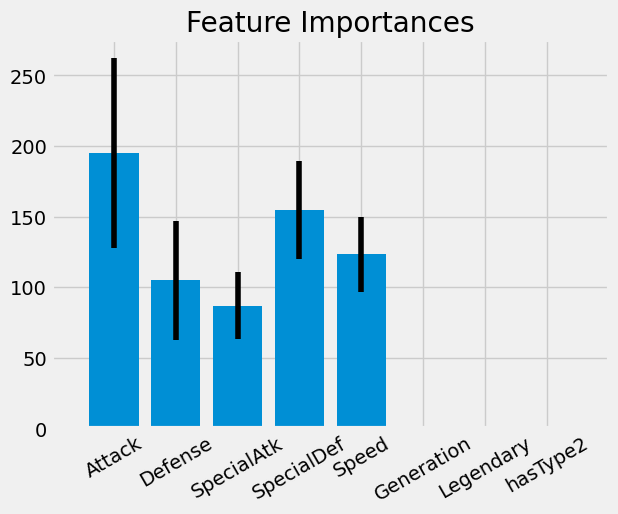

In [64]:
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# 利用 kNN 預測 hasType2 (把 hasType2 當作目標變數，類別型特徵當作特徵)
X, y = df.loc[:, 'HP':'Legendary'], df['hasType2']

# 初始化 kNN 分類器
model = KNeighborsClassifier().fit(X, y)

# 計算特徵重要性
selector = permutation_importance(
    model, 
    X, 
    y, 
    n_repeats=10,
    scoring='accuracy', 
    n_jobs=-1
)
'''
model: 擬合的模型
X: 特徵
y: 目標變數
n_repeats: 重複次數
scoring: 評估指標，其中 accuracy 代表準確率，越高越好
n_jobs: 使用的 CPU 核心數
'''

# 取得特徵重要性
importance = selector.importances_mean

# 取得特徵重要性的標準差
std = selector.importances_std

# 按特徵重要性排序
idx = np.argsort(importance)[::-1]

# 檢視特徵數量
print(X.shape[1])

print("特徵重要性排序：")
for c in range(X.shape[1]):
    print(f'{c+1}. {X.columns[idx[c]]}', end='')
    print(f'\t (feature {idx[c]}: {importance[idx[c]]})')

8
特徵重要性排序：
1. SpecialAtk	 (feature 3: 0.06547619047619044)
2. Speed	 (feature 5: 0.06488095238095234)
3. Defense	 (feature 2: 0.05535714285714283)
4. Attack	 (feature 1: 0.044047619047619016)
5. HP	 (feature 0: 0.03452380952380949)
6. SpecialDef	 (feature 4: 0.019642857142857094)
7. Legendary	 (feature 7: 0.0)
8. Generation	 (feature 6: 0.0)


(-1.0, 8.0)

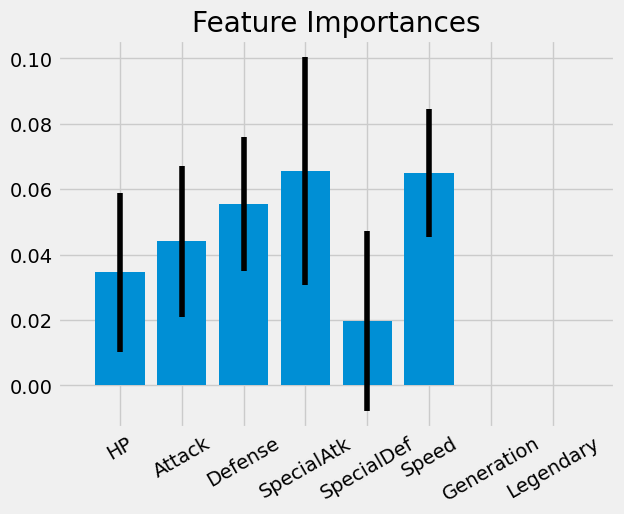

In [68]:
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 利用 kNN 預測 hasType2
X, y = df.loc[:, 'HP':'Legendary'], df['hasType2']

# 特徵標準化
X_std = StandardScaler().fit_transform(X)

# 先將特徵標準化，得到的結果比較穩定
model = KNeighborsClassifier().fit(X_std, y)

selector = permutation_importance(
    model, 
    X_std, 
    y, 
    n_repeats=10,
    scoring='accuracy', 
    n_jobs=-1
)

# 取得特徵重要性
importance = selector.importances_mean

# 取得特徵重要性的標準差
std = selector.importances_std

# 按特徵重要性排序
idx = np.argsort(importance)[::-1]

# 檢視特徵數量
print(X.shape[1])

print("特徵重要性排序：")
for c in range(X.shape[1]):
    print(f'{c+1}. {X.columns[idx[c]]}', end='')
    print(f'\t (feature {idx[c]}: {importance[idx[c]]})')

8
特徵重要性排序：
1. Speed	 (feature 5: 0.07797619047619041)
2. Defense	 (feature 2: 0.06369047619047614)
3. SpecialDef	 (feature 4: 0.057142857142857065)
4. HP	 (feature 0: 0.05297619047619041)
5. Attack	 (feature 1: 0.05178571428571423)
6. SpecialAtk	 (feature 3: 0.044642857142857095)
7. Legendary	 (feature 7: 0.01904761904761899)
8. Generation	 (feature 6: -0.005952380952381042)


(-1.0, 8.0)

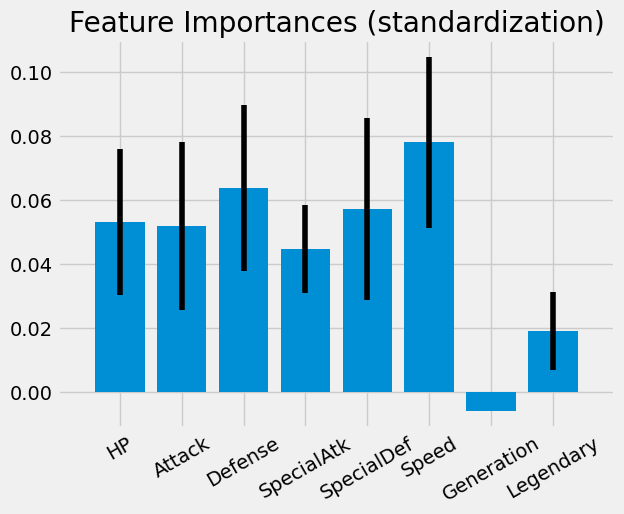

In [72]:
plt.title("Feature Importances (standardization)")
plt.bar(range(X.shape[1]), importance, yerr=std)
plt.xticks(range(X.shape[1]), X.columns, rotation=30)
plt.xlim([-1, X.shape[1]])